<img src="images/intro.jpeg">

<center><h1><b> Project - Pedidos </b></h1></center>

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">1. Imports</h1></center>
</div>

In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
from matplotlib import pyplot as plt

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">2. Read Files</h1></center>
</div>

Importar as 3 bases de dados relativas às intervenções para 3 DataFrames pandas.

In [2]:
pedidos1 = pd.read_excel("databases/apura_iscte_lpedidos_ant.xlsx")
pedidos1.shape

(318253, 47)

In [3]:
pedidos2 = pd.read_excel("databases/apura_iscte_lpedidos_apos.xlsx")
pedidos2.shape

(384551, 47)

In [4]:
pedidos3 = pd.read_excel("databases/apura_iscte_m01.xlsx")
pedidos3.shape

(49593, 45)

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">3. Limpeza das bases de dados </h1></center>
</div>

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">3.1. Seleção de variáveis para análise</h3></center>
</div>

In [5]:
pedidos1 = pedidos1[['UTE_ID','ANO_MES','DTIPO_MOVIMENTO','CENTROA','DCENTRO_AB',
                     'DEFICIENCIA', 'DDEFICIENCIA', 'HABILITACAO','IDADE','NACIONALIDADE', 
                     'DNACIONALIDADE','SEXO','CATEGORIA','CPP_PRETENDIDA','DCPP_PRETENDIDA', 'CAE_ANTERIOR','MOTIVO_INSCRICAO','DMOTIVO_INSCRICAO']]

In [6]:
pedidos2 = pedidos2[['UTE_ID','ANO_MES','DTIPO_MOVIMENTO','CENTROA','DCENTRO_AB',
                     'DEFICIENCIA', 'DDEFICIENCIA', 'HABILITACAO','IDADE','NACIONALIDADE', 
                     'DNACIONALIDADE','SEXO','CATEGORIA','CPP_PRETENDIDA','DCPP_PRETENDIDA', 'CAE_ANTERIOR','MOTIVO_INSCRICAO','DMOTIVO_INSCRICAO']]

In [7]:
pedidos3 = pedidos3[['UTE_ID','ANO_MES','DTIPO_MOVIMENTO','CENTROA','DCENTRO_AB',
                     'DEFICIENCIA', 'DDEFICIENCIA', 'HABILITACAO','IDADE','NACIONALIDADE', 
                     'DNACIONALIDADE','SEXO','CATEGORIA','CPP_PRETENDIDA','DCPP_PRETENDIDA', 'CAE_ANTERIOR','MOTIVO_INSCRICAO','DMOTIVO_INSCRICAO']]

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">3.2. Tratamento de valores omissos</h3></center>
</div>

In [8]:
pedidos1.isnull().sum()

UTE_ID                   0
ANO_MES                  0
DTIPO_MOVIMENTO          0
CENTROA                  0
DCENTRO_AB              12
DEFICIENCIA              0
DDEFICIENCIA             0
HABILITACAO              0
IDADE                    0
NACIONALIDADE            0
DNACIONALIDADE           0
SEXO                     0
CATEGORIA                0
CPP_PRETENDIDA         334
DCPP_PRETENDIDA        334
CAE_ANTERIOR         39494
MOTIVO_INSCRICAO         0
DMOTIVO_INSCRICAO        0
dtype: int64

In [9]:
pedidos1 = pedidos1.dropna()
pedidos1.shape

(278621, 18)

In [10]:
pedidos2.isnull().sum()

UTE_ID                   0
ANO_MES                  0
DTIPO_MOVIMENTO          0
CENTROA                  0
DCENTRO_AB               3
DEFICIENCIA              0
DDEFICIENCIA             0
HABILITACAO              0
IDADE                    0
NACIONALIDADE            0
DNACIONALIDADE           0
SEXO                     0
CATEGORIA                0
CPP_PRETENDIDA         260
DCPP_PRETENDIDA        260
CAE_ANTERIOR         45418
MOTIVO_INSCRICAO         0
DMOTIVO_INSCRICAO        0
dtype: int64

In [11]:
pedidos2 = pedidos2.dropna()
pedidos2.shape

(339028, 18)

In [12]:
pedidos3.isnull().sum()

UTE_ID                  0
ANO_MES                 0
DTIPO_MOVIMENTO         0
CENTROA                 0
DCENTRO_AB              0
DEFICIENCIA             0
DDEFICIENCIA            0
HABILITACAO             0
IDADE                   0
NACIONALIDADE           0
DNACIONALIDADE          0
SEXO                    0
CATEGORIA               0
CPP_PRETENDIDA         19
DCPP_PRETENDIDA        19
CAE_ANTERIOR         6711
MOTIVO_INSCRICAO        0
DMOTIVO_INSCRICAO       0
dtype: int64

In [13]:
pedidos3 = pedidos3.dropna()
pedidos3.shape

(42872, 18)

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">3.4. Junção das bases de dados</h3></center>
</div>

In [14]:
# junção vertical das tabelas
pedidos_final = [pedidos1, pedidos2, pedidos3]
pedidos_final = pd.concat(pedidos_final)

pedidos_final.shape

(660521, 18)

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">4. Análise de variáveis</h1></center>
</div>

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">4.1. Análise UTE_ID</h3></center>
</div>

In [15]:
# Em 660521 observações existem apenas 73316 valores diferentes para UTE_ID
pedidos_final['UTE_ID'].nunique()

73316

In [16]:
# Visualizar alguns dos duplicados
duplicados = pedidos_final.duplicated(subset=['UTE_ID'])
teste_duplicados = pedidos_final[duplicados]
teste_duplicados.head(5)

,UTE_ID,ANO_MES,DTIPO_MOVIMENTO,CENTROA,DCENTRO_AB,DEFICIENCIA,DDEFICIENCIA,HABILITACAO,IDADE,NACIONALIDADE,DNACIONALIDADE,SEXO,CATEGORIA,CPP_PRETENDIDA,DCPP_PRETENDIDA,CAE_ANTERIOR,MOTIVO_INSCRICAO,DMOTIVO_INSCRICAO
6,1102550,201703,PEDIDOS DE EMPREGO AO LONGO DO MÊS,123,CTEF Bragança,0,NÃO DEFICIENTE,04,55,PT,PORTUGAL,M,2,63100.0,AGRICULTOR DE SUBSISTÊNCIA,2100.0,8,FIM DE TRABALHO NÃO PERMANENTE
11,5113515,201709,MUDANÇAS CATEGORIA,123,CTEF Bragança,0,NÃO DEFICIENTE,LC,27,PT,PORTUGAL,F,2,42210.0,EMPREGADO DAS AGÊNCIAS DE VIAGENS,47111.0,8,FIM DE TRABALHO NÃO PERMANENTE
14,1126019,201803,MUDANÇAS CATEGORIA,123,CTEF Bragança,0,NÃO DEFICIENTE,12,43,PT,PORTUGAL,F,2,52230.0,VENDEDOR EM LOJA (ESTABELECIMENTO),86100.0,3,FIM DE CURSO DE FORMAÇÃO
15,1126019,201611,MUDANÇAS CATEGORIA,123,CTEF Bragança,0,NÃO DEFICIENTE,12,41,PT,PORTUGAL,F,5,52230.0,VENDEDOR EM LOJA (ESTABELECIMENTO),86100.0,3,FIM DE CURSO DE FORMAÇÃO
16,1126019,201608,MUDANÇAS CATEGORIA,123,CTEF Bragança,0,NÃO DEFICIENTE,12,41,PT,PORTUGAL,F,2,52230.0,VENDEDOR EM LOJA (ESTABELECIMENTO),86100.0,3,FIM DE CURSO DE FORMAÇÃO


In [17]:
# eliminar duplicados do subconjunto UTE_ID e CPP_PRETENDIDA
pedidos_final = pedidos_final.drop_duplicates(subset=["UTE_ID", "CPP_PRETENDIDA"])
pedidos_final.shape

(82855, 18)

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">4.2. Análise Tipo de Movimento</h3></center>
</div>

In [18]:
# diferentes tipos de movimentos
pedidos_final['DTIPO_MOVIMENTO'].unique()

array(['PEDIDOS DE EMPREGO AO LONGO DO MÊS', 'MUDANÇAS CATEGORIA',
       'ANULAÇÕES AO LONGO DO MÊS', 'COLOCAÇÕES AO LONGO DO MÊS',
       'PEDIDOS DE EMPREGO NO FIM DO MÊS'], dtype=object)

In [19]:
pedidos_final['DTIPO_MOVIMENTO'].value_counts()

MUDANÇAS CATEGORIA                    62399
ANULAÇÕES AO LONGO DO MÊS              9643
PEDIDOS DE EMPREGO AO LONGO DO MÊS     9001
COLOCAÇÕES AO LONGO DO MÊS             1359
PEDIDOS DE EMPREGO NO FIM DO MÊS        453
Name: DTIPO_MOVIMENTO, dtype: int64

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">4.3. Análise Habilitação</h3></center>
</div>

In [20]:
pedidos_final['HABILITACAO'].value_counts()

12    26914
09    20978
06    11989
04     7874
LC     7663
SL     2331
11     2172
MT     1411
NS      515
BM      509
PS      445
DT       54
Name: HABILITACAO, dtype: int64

Text(0.5, 0, 'Nº de ocurrencias')

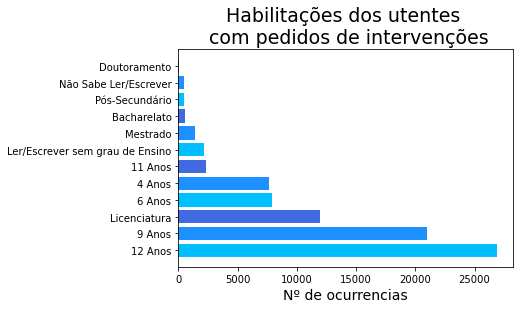

In [21]:
# Gráfico Habilitacao dos pedidos de emprego

freq_abs = pedidos_final["HABILITACAO"].value_counts()

habilitações = ["12 Anos", "9 Anos", "Licenciatura", "6 Anos", "4 Anos", 
                "11 Anos", "Ler/Escrever sem grau de Ensino", "Mestrado", 
                "Bacharelato", "Pós-Secundário", "Não Sabe Ler/Escrever", "Doutoramento"]

plt.barh(habilitações, freq_abs, color=["#00BFFF", "#1E90FF", "#4169E1"])
plt.title("Habilitações dos utentes \n com pedidos de intervenções", size=19)
plt.xlabel("Nº de ocurrencias", size=14)

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">4.4. Análise da area profissional pretendida</h3></center>
</div>

In [40]:
pedidos_final['DCPP_PRETENDIDA'].value_counts().head(10)

EMPREGADO DE ESCRITÓRIO EM GERAL                                           6424
TRABALHADOR DE LIMPEZA EM ESCRITÓRIOS, HOTÉIS E OUTROS ESTABELECIMENTOS    4991
VENDEDOR EM LOJA (ESTABELECIMENTO)                                         4907
OUTROS TRABALHADORES NÃO QUALIFICADOS DA INDÚSTRIA TRANSFORMADORA          4047
ASSISTENTE DE VENDA DE ALIMENTOS AO BALCÃO                                 2767
AUXILIAR DE CUIDADOS DE CRIANÇAS                                           2449
AJUDANTE DE COZINHA                                                        2425
AJUDANTE FAMILIAR                                                          2146
EMPREGADO DE MESA                                                          1698
EMPREGADO DE ARMAZÉM                                                       1551
Name: DCPP_PRETENDIDA, dtype: int64

Text(0.5, 0, 'Nº de ocurrencias')

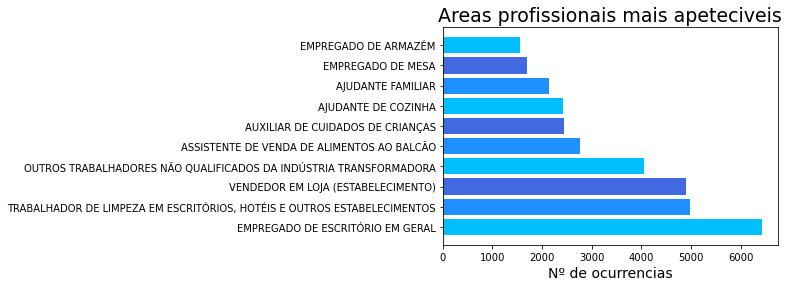

In [41]:
# Gráfico Areas pretendidas do top 10 dos pedidos de emprego

freq_abs_areas = pd.DataFrame(pedidos_final["DCPP_PRETENDIDA"].value_counts().head(10))


areas = freq_abs.index

plt.barh(areas, freq_abs_areas['DCPP_PRETENDIDA'], color=["#00BFFF", "#1E90FF", "#4169E1"])
plt.title("Areas profissionais mais apeteciveis", size=19)
plt.xlabel("Nº de ocurrencias", size=14)

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">4.5. Análise da idade</h3></center>
</div>

In [25]:
pedidos_final['IDADE'].mean()

41.100199143081284

(array([4.4530e+03, 1.0859e+04, 1.1197e+04, 1.0813e+04, 1.3902e+04,
        1.2552e+04, 1.0100e+04, 7.4540e+03, 1.5160e+03, 9.0000e+00]),
 array([17. , 22.7, 28.4, 34.1, 39.8, 45.5, 51.2, 56.9, 62.6, 68.3, 74. ]),
 <a list of 10 Patch objects>)

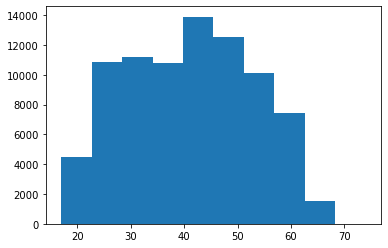

In [26]:
plt.hist(pedidos_final['IDADE'])

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">4.6. Análise do Motivo de inscrição</h3></center>
</div>

In [27]:
freq_abs_motivo = pedidos_final['DMOTIVO_INSCRICAO'].value_counts().head(5)

FIM DE TRABALHO NÃO PERMANENTE                                32995
REINSCRIÇÃO NA SEQUÊNCIA DE FALTA CONV/CONTROLO               14185
FOI DESPEDIDO                                                 12793
DESPEDIMENTO COM MÚTUO ACORDO                                  5157
MÁS CONDIÇÕES DE TRABALHO, SUB-UTILIZAÇÃO OU BAIXO SALÁRIO     3323
Name: DMOTIVO_INSCRICAO, dtype: int64

Text(0.5, 0, 'Nº de ocurrencias')

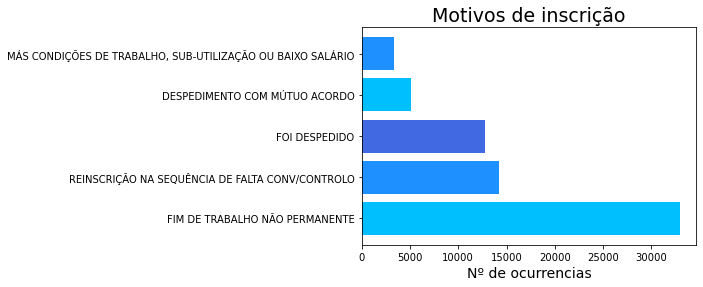

In [44]:
# Gráfico Motivo de inscriçao do top 5 dos pedidos de emprego

freq_abs_motivo = pd.DataFrame(pedidos_final["DMOTIVO_INSCRICAO"].value_counts().head(5))


motivos_insc = freq_abs_motivo.index

plt.barh(motivos_insc , freq_abs_motivo['DMOTIVO_INSCRICAO'], color=["#00BFFF", "#1E90FF", "#4169E1"])
plt.title("Motivos de inscrição", size=19)
plt.xlabel("Nº de ocurrencias", size=14)

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">5. Exportar dataset final</h1></center>
</div>

In [47]:
# dataset para permitir a identificação da região, consoante o centro de emprego
pedidos_final = pedidos_final[['UTE_ID', 'CPP_PRETENDIDA', 'DCPP_PRETENDIDA' ,'MOTIVO_INSCRICAO','DMOTIVO_INSCRICAO']]
pedidos_final.head()

,UTE_ID,CPP_PRETENDIDA,DCPP_PRETENDIDA,MOTIVO_INSCRICAO,DMOTIVO_INSCRICAO
4,2548412,91110.0,TRABALHADOR DE LIMPEZA EM CASAS PARTICULARES,12,REINSCRIÇÃO NA SEQUÊNCIA DE FALTA CONV/CONTROLO
5,1102550,63100.0,AGRICULTOR DE SUBSISTÊNCIA,8,FIM DE TRABALHO NÃO PERMANENTE
7,6172405,82110.0,MONTADOR DE MAQUINARIA MECÂNICA,5,FOI DESPEDIDO
9,1068668,52490.0,"OUTROS TRABALHADORES RELACIONADOS COM VENDAS, NE",5,FOI DESPEDIDO
10,5113515,42210.0,EMPREGADO DAS AGÊNCIAS DE VIAGENS,8,FIM DE TRABALHO NÃO PERMANENTE


In [48]:
pedidos_final.isnull().sum()

UTE_ID               0
CPP_PRETENDIDA       0
DCPP_PRETENDIDA      0
MOTIVO_INSCRICAO     0
DMOTIVO_INSCRICAO    0
dtype: int64

In [49]:
pedidos_final.shape

(82855, 5)

In [50]:
pedidos_final.to_csv("databases/pedidos.csv")